# HEALTH INSURANCE PREDICTION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
insurance_dataset = pd.read_csv('../health_insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_dataset.shape

(1338, 7)

In [4]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_dataset['bmi'].quantile(0.99)

np.float64(46.40789999999996)

### Independent ColumngContribution

- Age Contribution

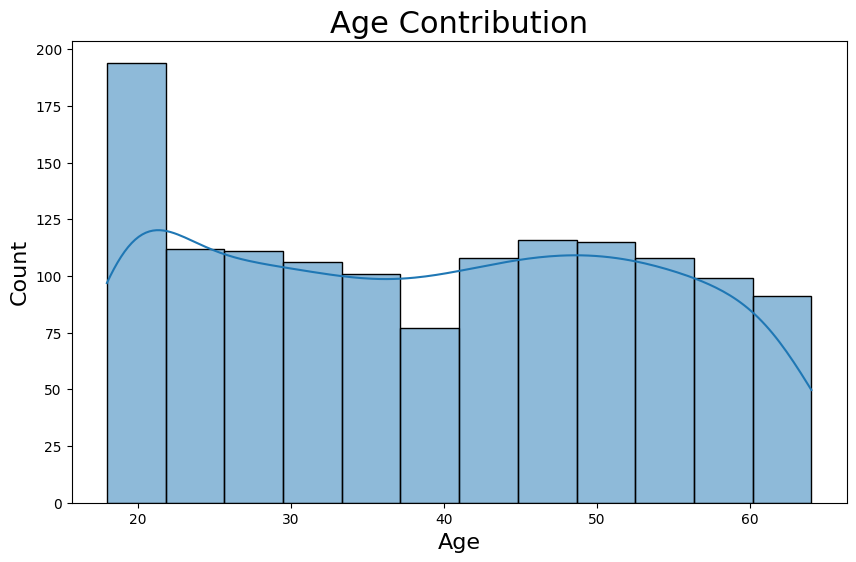

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_dataset['age'], kde=True)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Age Contribution', fontsize=22)
plt.show()

- Sex Contribution

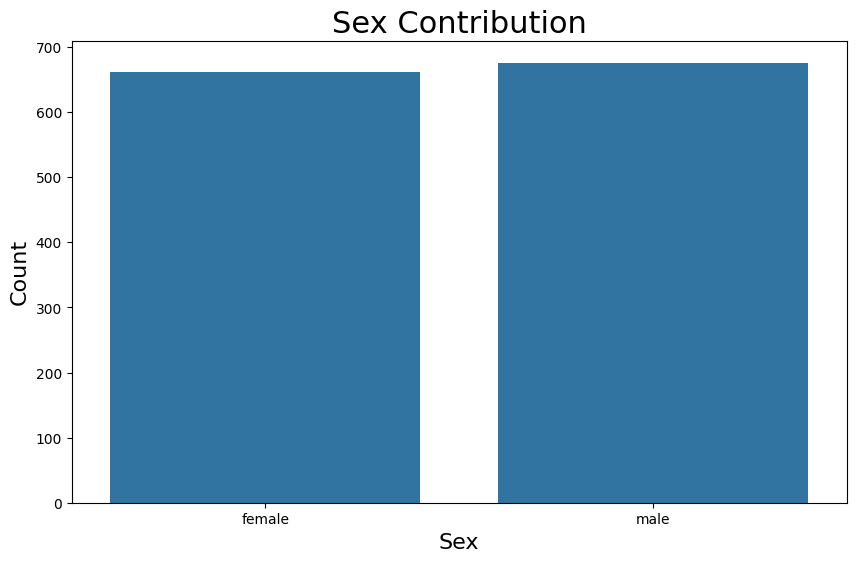

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=insurance_dataset)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Sex Contribution', fontsize=22)
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

- BMI Contribution

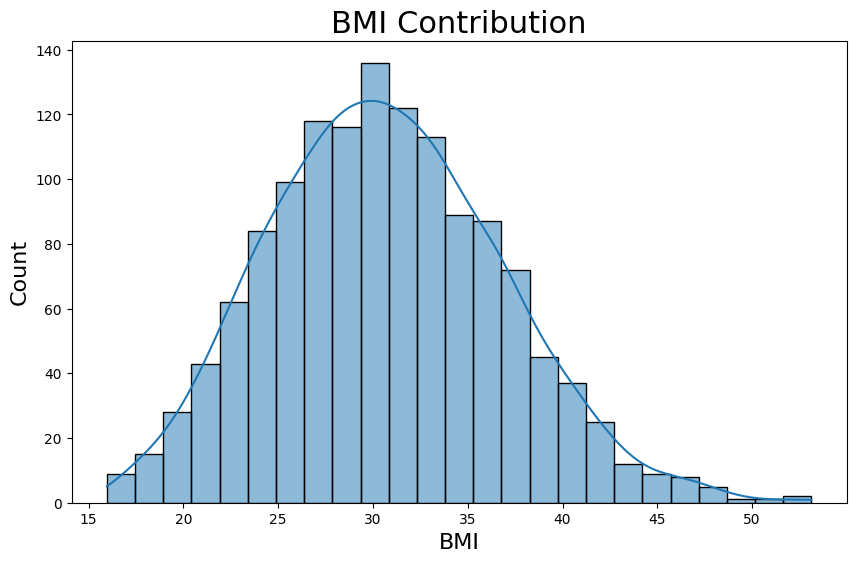

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_dataset['bmi'], kde=True)
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('BMI Contribution', fontsize=22)
plt.show()

- Children Contribution

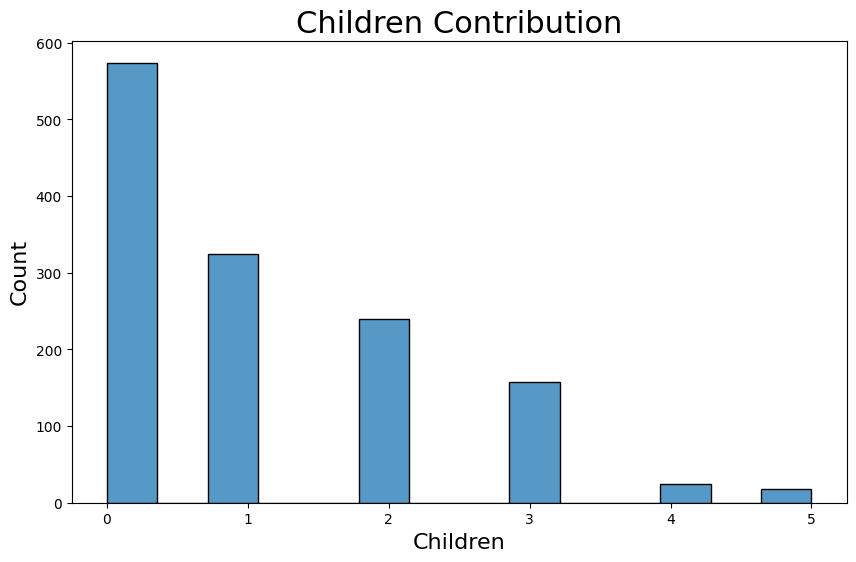

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x='children', data=insurance_dataset)
plt.xlabel('Children', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Children Contribution', fontsize=22)
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

- Smoker Contribution

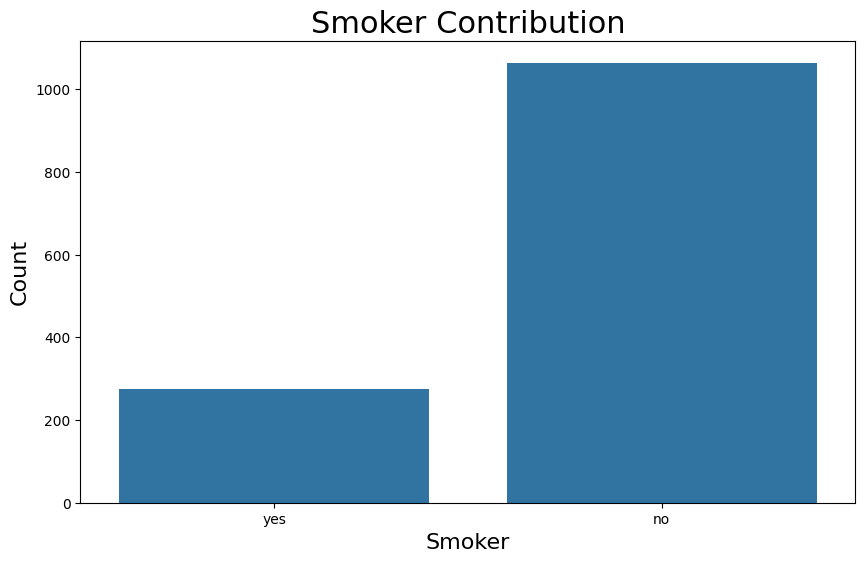

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.xlabel('Smoker', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Smoker Contribution', fontsize=22)
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

- Region Contribution

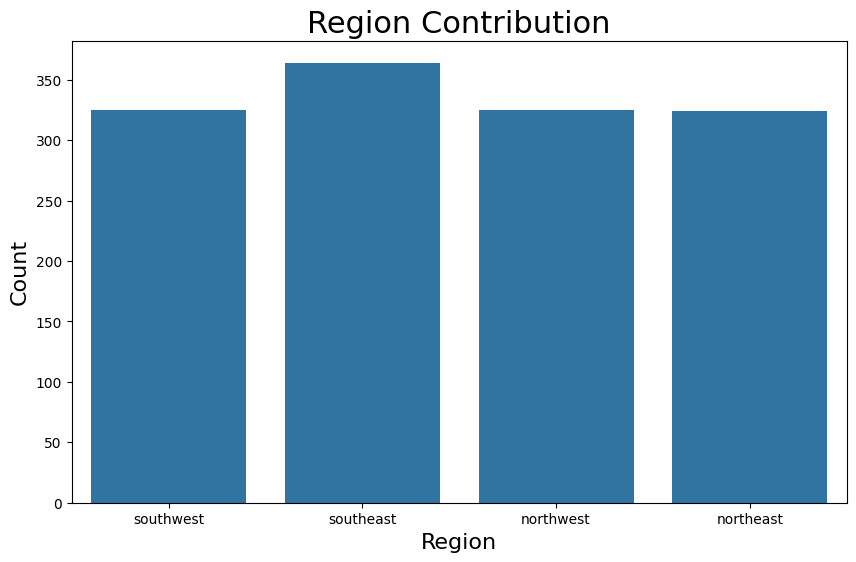

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=insurance_dataset)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Region Contribution', fontsize=22)
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64